Зотов Роман Алексеевич 6132
<br>Тема лабораторной работы: визуализация данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Задание 1

Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п. Также можно сконвертировать в DataFrame любой из встроенных датасетов sklearn

In [2]:
df = pd.concat(pd.read_csv(f'./20250{i}/players.csv') for i in range(1,5))
df

C:\Users\Roma\AppData\Local\Temp\ipykernel_19444\2438505430.py:1: DtypeWarning: Columns (148) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(pd.read_csv(f'./20250{i}/players.csv') for i in range(1,5))
C:\Users\Roma\AppData\Local\Temp\ipykernel_19444\2438505430.py:1: DtypeWarning: Columns (51,52,128,150) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(pd.read_csv(f'./20250{i}/players.csv') for i in range(1,5))


,player_slot,obs_placed,sen_placed,creeps_stacked,camps_stacked,rune_pickups,firstblood_claimed,teamfight_participation,towers_killed,roshans_killed,...,purchase_rapier,match_id,leagueid,performance_others,additional_units,repicked,hero_variant,neutral_tokens_log,neutral_item_history,item_neutral2
0,0,0.0,0.0,4.0,2.0,1.0,0.0,0.863636,0.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,"[{'time': 433, 'key': 'Tier1Token'}, {'time': ...",NaN,NaN
1,1,2.0,0.0,3.0,1.0,5.0,0.0,0.636364,3.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,"[{'time': 1918, 'key': 'Tier3Token'}]",NaN,NaN
2,2,0.0,0.0,6.0,2.0,7.0,0.0,0.227273,2.0,1.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,"[{'time': 473, 'key': 'Tier1Token'}, {'time': ...",NaN,NaN
3,3,9.0,12.0,66.0,12.0,1.0,0.0,0.227273,0.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,[],NaN,NaN
4,4,4.0,5.0,43.0,7.0,3.0,0.0,0.818182,1.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,128,3.0,2.0,8.0,3.0,0.0,0.0,0.400000,0.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,3.0,[],"[{'time': 488, 'item_neutral': 'mana_draught',...",1586.0
6416,129,0.0,0.0,0.0,0.0,3.0,0.0,0.266667,0.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,1.0,[],"[{'time': 450, 'item_neutral': 'polliwog_charm...",1577.0
6417,130,1.0,1.0,3.0,1.0,2.0,0.0,0.333333,1.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,2.0,[],"[{'time': 458, 'item_neutral': 'spark_of_coura...",1594.0
6418,131,2.0,0.0,0.0,0.0,11.0,0.0,0.866667,2.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,1.0,[],"[{'time': 461, 'item_neutral': 'trusty_shovel'...",1583.0


In [3]:
df = df[df.match_id.groupby(df.match_id).transform('count').eq(10)]

# Задание 2

Описание датасета приведено в README.md, так же там отображены графики с разных заданий

# Задание 3

matplotlib:

Построить несколько графиков разного вида с использованием matplotlib.
<br>Построить несколько суб-графиков на одном графике используя .subplot.
<br>Построить интерактивный график со слайдером.
<br>  Графики должны быть разных видов.
<br>  Хотя бы в одном графике необходимо подписать оси.
<br>  Во всех графиках необходимо указать название.
<br>  Необязательно строить сложный и перегруженный информацией интерактивный график, достаточно одного-двух числовых признаков в разрезе другого признака, как минимум добавить слайдер (ползунок). Наличие других графических элементов управления (кнопки и т.п.) - опционально.

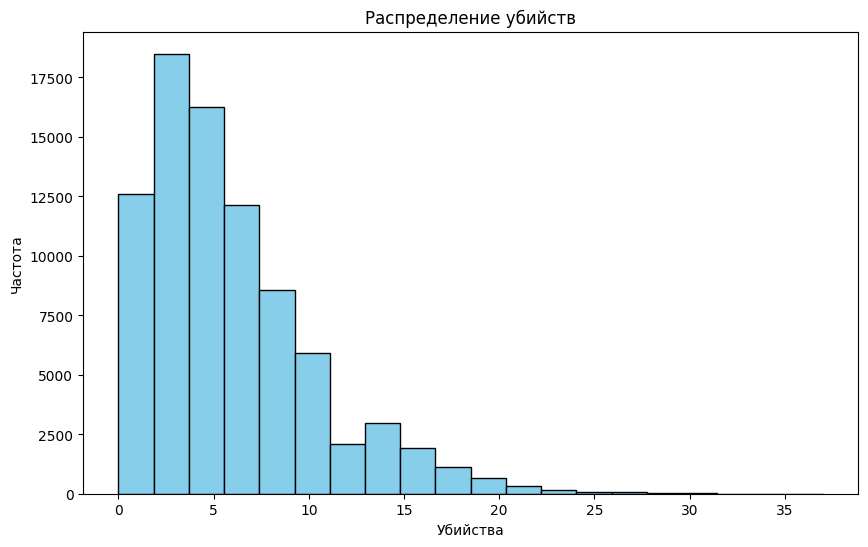

In [4]:
#частота убийств
plt.figure(figsize=(10, 6))
plt.hist(df['kills'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение убийств')
plt.xlabel('Убийства')
plt.ylabel('Частота')
plt.savefig('matplotlib_kills.png')
plt.show()

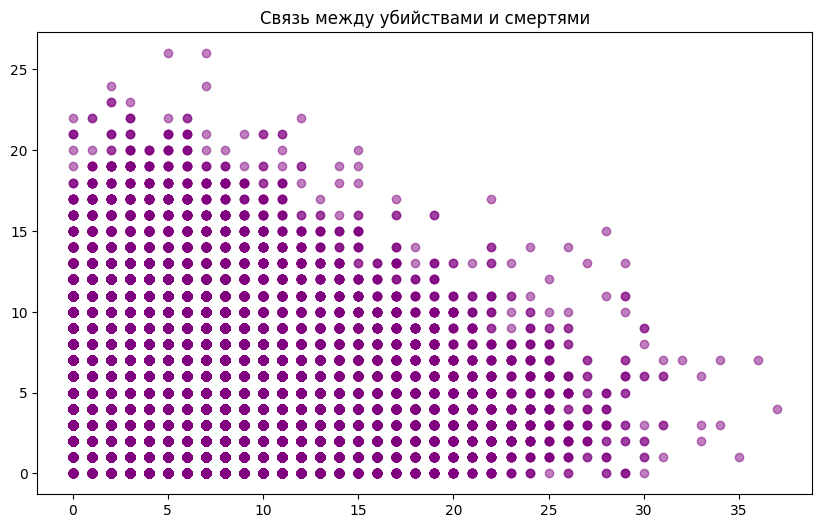

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['kills'], df['deaths'], alpha=0.5, color='purple')
plt.title('Связь между убийствами и смертями')
plt.savefig('matplotlib_kills_death.png')
plt.show()

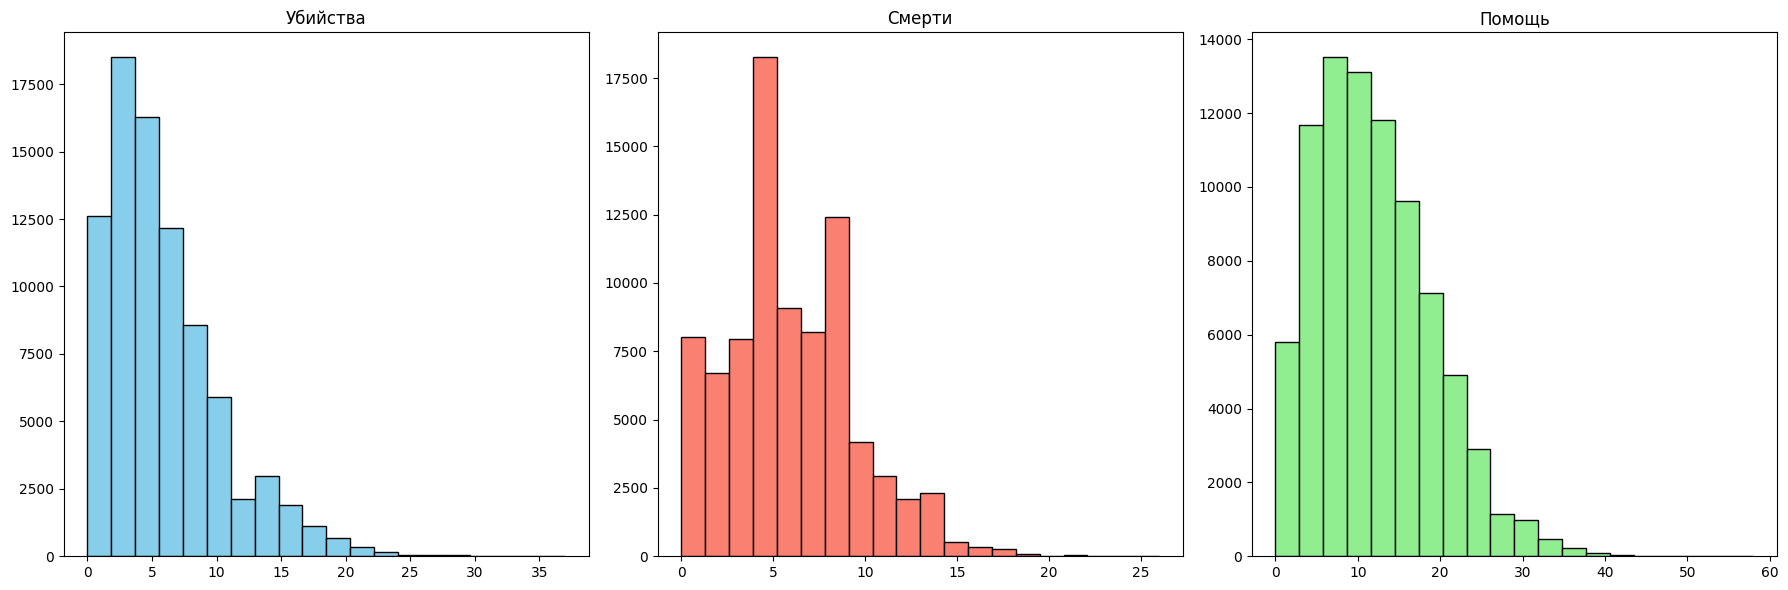

In [6]:
#суб-графики для kills, deaths и assists
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 строка, 3 столбца

# Гистограмма для kills
axs[0].hist(df['kills'], bins=20, color='skyblue', edgecolor='black')

axs[0].set_title('Убийства')

# Гистограмма для deaths
axs[1].hist(df['deaths'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Смерти')

# Гистограмма для assists
axs[2].hist(df['assists'], bins=20, color='lightgreen', edgecolor='black')
axs[2].set_title('Помощь')

plt.tight_layout()  # Автоматическая корректировка расстояния между графиками
plt.savefig('matplotlib_kills_death_help.png')
plt.show()

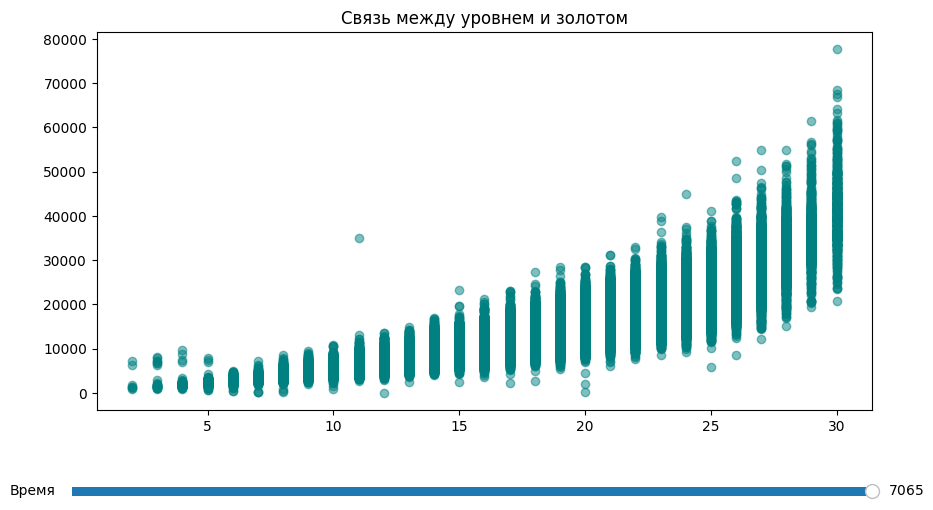

In [7]:
# 5. Построение интерактивного графика со слайдером
# График зависимости net_worth от level с фильтром по duration

# Определяем минимальное и максимальное значение время игры
min_duration = df['duration'].min()
max_duration = df['duration'].max()

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(bottom=0.25)  # Оставляем место для слайдера

# Изначальный график
scatter = ax.scatter(df['level'], df['net_worth'], alpha=0.5, color='teal')
ax.set_title('Связь между уровнем и золотом')  # Название графика

# Создаем слайдер
ax_duration = plt.axes([0.1, 0.1, 0.8, 0.03])  # Позиция слайдера
slider = Slider(ax_duration, 'Время', min_duration, max_duration, valinit=max_duration)

# Функция обновления графика при изменении слайдера
def update(val):
    max_dur = slider.val
    filtered_df = df[df['duration'] <= max_dur]  # Фильтруем данные
    scatter.set_offsets(list(zip(filtered_df['level'], filtered_df['net_worth'])))  # Обновляем точки
    fig.canvas.draw_idle()

# Привязываем функцию к слайдеру
slider.on_changed(update)

plt.savefig('matplotlib_slider.png')

plt.show()

# Задание 4

Построить три разных вида графиков с использованием pandas.DataFrame.plot / Series.plot.
<br>Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой).
<br>Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

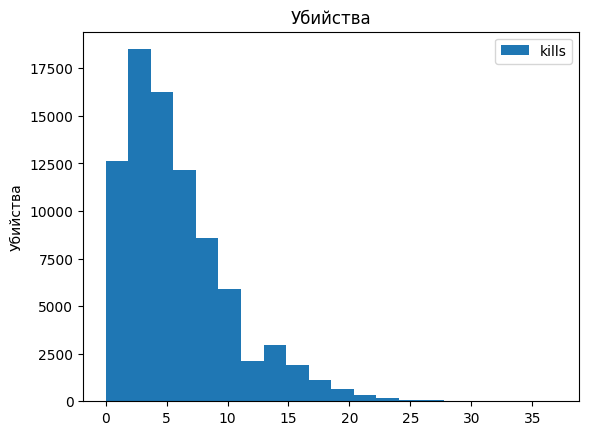

In [8]:
#axs[0].hist(df['kills'], bins=20, color='skyblue', edgecolor='black')
#axs[0].set_title('Убийства')

df.plot(kind='hist', bins=20, column='kills', title='Убийства')
plt.ylabel('Убийства')
plt.savefig('pandas_kills.png')
plt.show()
plt.close()

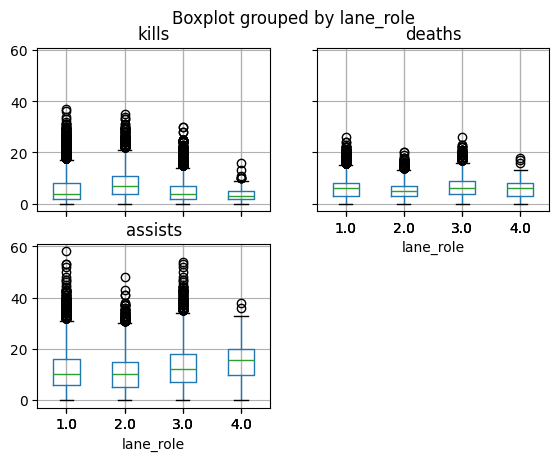

In [9]:
# График с boxplot
df.boxplot(column = ['kills','deaths','assists'], by = 'lane_role')
plt.ylabel('Убийства')
plt.savefig('pandas_by_role.png')
plt.show()
plt.close()

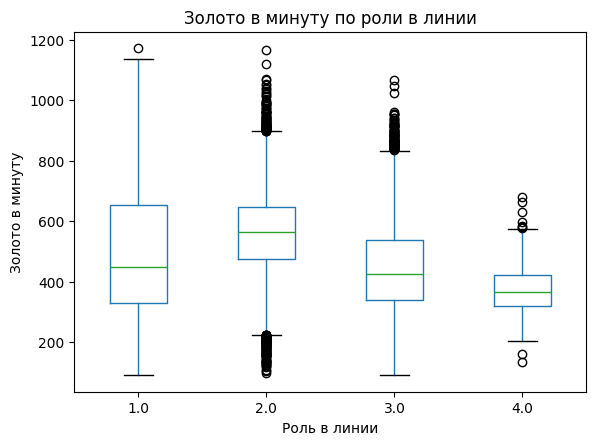

In [10]:
df.boxplot(column='gold_per_min', by='lane_role', grid=False)
plt.title('Золото в минуту по роли в линии')
plt.suptitle('')  # Убираем автоматически добавленный заголовок
plt.xlabel('Роль в линии')
plt.ylabel('Золото в минуту')
plt.savefig('pandas_gold_by_role.png')
plt.show()
plt.close()

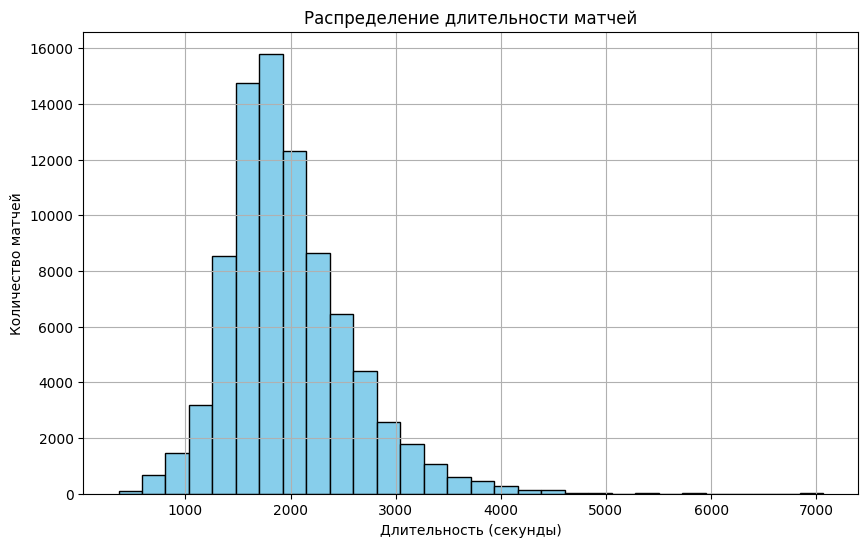

In [11]:
# 2. Гистограмма через Series.plot 

df['duration'].plot.hist(
    bins=30,
    figsize=(10, 6),
    edgecolor='black',
    grid=True,
    color='skyblue'
)
plt.title('Распределение длительности матчей')
plt.xlabel('Длительность (секунды)')
plt.ylabel('Количество матчей')
plt.savefig('pandas_time.png')
plt.show()
plt.close()

# Задание 5

Построить .pairplot на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.
<br>Построить .jointplot, проанализировать взаимосвязь двух конкретных числовых признаков.
<br>Построить .boxplot и/или .violinplot на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.
<br>Построить график .heatmap попарной корреляции всех числовых признаков.
<br>Категориальные признаки необходимо убрать из датафрейма перед построением.

In [12]:
import seaborn as sns

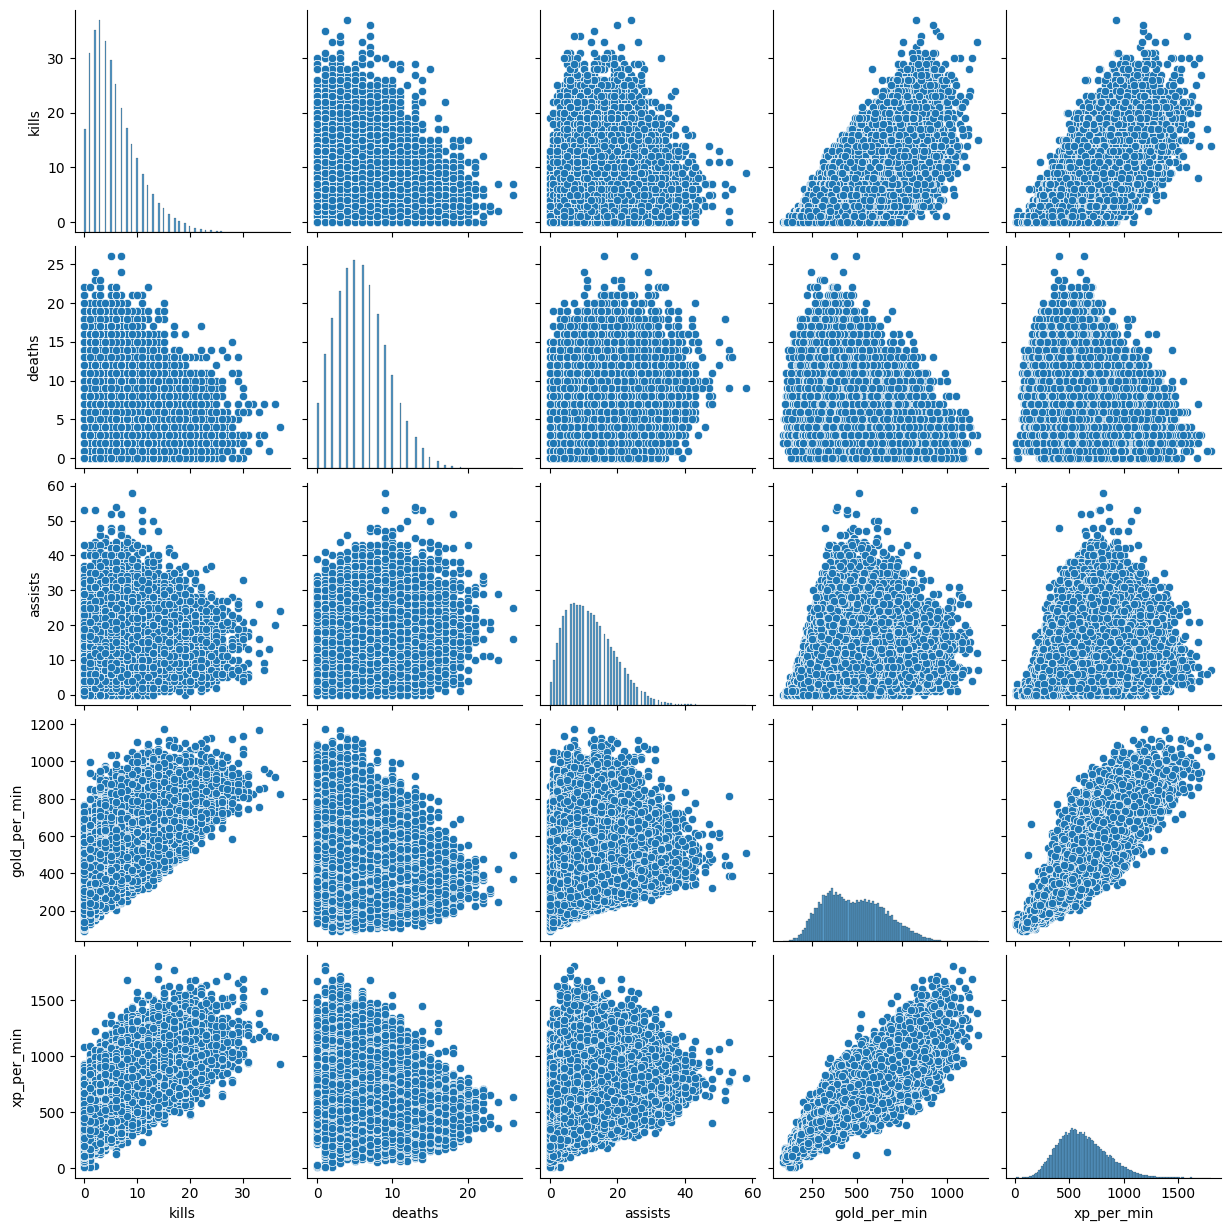

In [13]:
sns.pairplot(df[['kills', 'deaths', 'assists', 'gold_per_min', 'xp_per_min']])
plt.savefig('seaborn_kdagx.png')
plt.show()
plt.close()

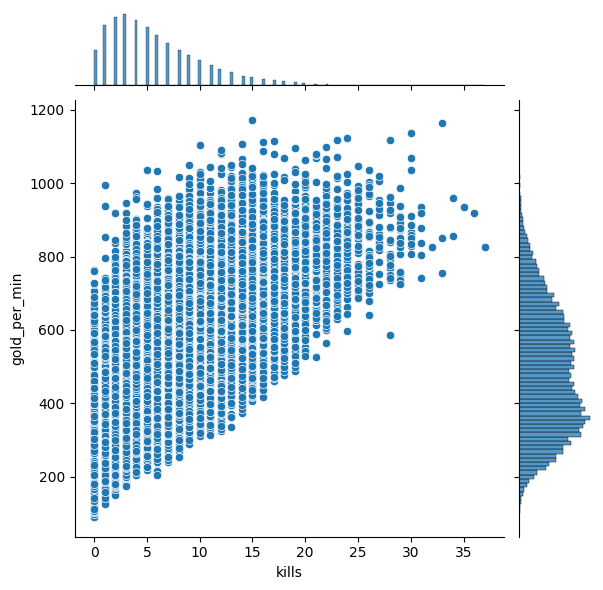

In [14]:
# 2. Jointplot для анализа взаимосвязи 'kills' и 'gold_per_min'
sns.jointplot(x='kills', y='gold_per_min', data=df, kind='scatter')
plt.savefig('jointplot_kills_gold.png')
plt.show()

C:\Users\Roma\AppData\Local\Temp\ipykernel_19444\2160736468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


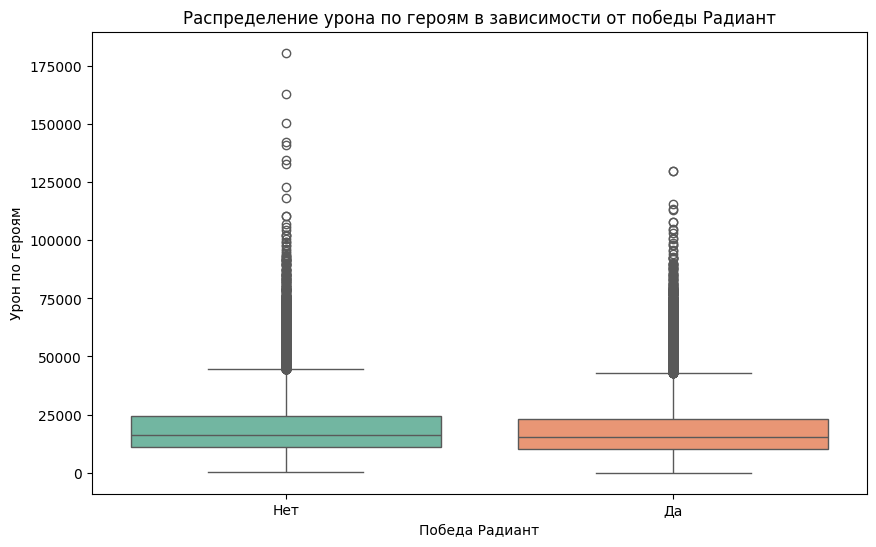

In [15]:
# 3. Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='radiant_win',  # Категориальный признак
    y='hero_damage',   # Числовой признак
    palette='Set2'
)
plt.title('Распределение урона по героям в зависимости от победы Радиант')
plt.xlabel('Победа Радиант')
plt.ylabel('Урон по героям')
plt.xticks([0, 1], ['Нет', 'Да'])
plt.savefig('seaborn_boxplot_win_damage.png')
plt.show()


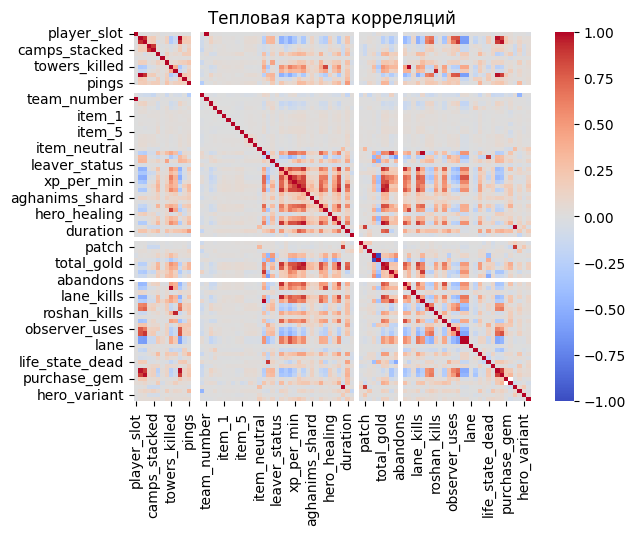

In [16]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Тепловая карта корреляций')
plt.savefig('seaborn_heatmap.png')
plt.show()

# Задание 6

scipy.stats:
<br>Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению.

In [17]:
from scipy import stats

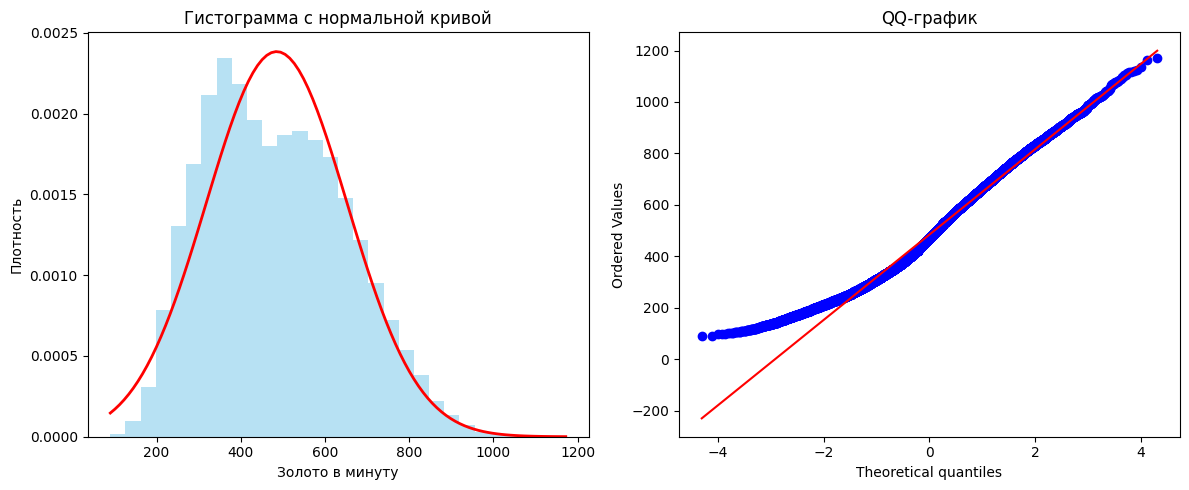

In [18]:
# Выберем числовой признак золото в минуту
# data = df[df['radiant_win']]['gold_per_min'].dropna()
data = df['gold_per_min'].dropna()

# Создаем фигуру с двумя суб-графиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма с наложенным нормальным распределением
ax1.hist(data, bins=30, density=True, alpha=0.6, color='skyblue')
mu, sigma = stats.norm.fit(data)
x = np.linspace(data.min(), data.max(), 100)
ax1.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2)
ax1.set_title('Гистограмма с нормальной кривой')
ax1.set_xlabel('Золото в минуту')
ax1.set_ylabel('Плотность')

# QQ-график
stats.probplot(data, dist="norm", plot=ax2)
ax2.set_title('QQ-график')

plt.tight_layout()
plt.savefig('scipy_norm.png')
plt.show()

# Задание 7

plotly:
<br>Построить несколько графиков разного вида.
<br>Построить несколько суб-графиков на одном графике.
<br>Построить интерактивный график.
<br>Использование Dash опционально.

In [19]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [20]:
fig1 = px.scatter(df.sample(1000),  # Sample for performance
                  x='kills', y='deaths', color='win',
                  title='Убийства против смертей по победам',
                  labels={'kills': 'Убийства', 'deaths': 'Смерти', 'win': 'Победа'},
                  hover_data=['lane_role'])
fig1.update_traces(marker_size=5)
fig1.write_image('plotly_scatter_kills_deaths.png')
fig1.show()

# Bar Plot: Average 'gold_per_min' by 'lane_role'
avg_gpm = df.groupby('lane_role')['gold_per_min'].mean().reset_index()
fig2 = px.bar(avg_gpm, x='lane_role', y='gold_per_min',
              title='Среднее золото в минуту по роли в линии',
              labels={'lane_role': 'Роль в линии', 'gold_per_min': 'Золото в минуту'})
fig2.write_image('plotly_bar_gold_per_min.png')
fig2.show()

# Histogram: Distribution of 'kills'
fig3 = px.histogram(df, x='kills', title='Гистограмма убийств',
                    labels={'kills': 'Убийства'})
fig3.write_image('plotly_histogram_kills.png')
fig3.show()

# 3.2 Subplots: Histograms of 'kills', 'deaths', 'assists'
fig4 = make_subplots(rows=1, cols=3, subplot_titles=('Убийства', 'Смерти', 'Помощь'))
fig4.add_trace(go.Histogram(x=df['kills'], name='Убийства'), row=1, col=1)
fig4.add_trace(go.Histogram(x=df['deaths'], name='Смерти'), row=1, col=2)
fig4.add_trace(go.Histogram(x=df['assists'], name='Помощь'), row=1, col=3)
fig4.update_layout(title='Гистограммы убийств, смертей и помощи')
fig4.write_image('plotly_subplots_histograms.png')
fig4.show()

# 3.3 Interactive Plot: Scatter with hover data and filtering
fig5 = px.scatter(df.sample(1000),  # Sample for performance
                  x='gold_per_min', y='xp_per_min', color='lane_role',
                  title='Интерактивный график: Золото в минуту vs Опыт в минуту',
                  labels={'gold_per_min': 'Золото в минуту', 'xp_per_min': 'Опыт в минуту', 'lane_role': 'Роль в линии'},
                  hover_data=['kills', 'deaths', 'assists'])
fig5.update_traces(marker_size=5)
fig5.write_image('plotly_scatter_gold_xp.png')
fig5.show()